In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import sys
from pathlib import Path

base_dir = Path().resolve().parent
data_dir = base_dir / 'data'
sys.path.append(str(base_dir))

In [2]:
data = pd.read_excel(data_dir / 'Project 2_2022.xlsx')

In [3]:
data.head()

,Date,Income,Outcome,Balance
0,2017-01-09 00:00:00.000,1.343028,1.487865,-0.155904
1,2017-01-10 00:00:00.000,1.068610,1.194182,-0.125572
2,2017-01-11 00:00:00.000,0.944429,0.936663,0.007767
3,2017-01-12 00:00:00.000,1.672202,0.875379,0.800391
4,2017-01-13 00:00:00.000,0.955924,0.975645,-0.019721


### Метод кумулятивных сумм для выявления разладки в среднем значении

Гиперпараметры подбирались вручную по визуальному соответствию.

In [4]:
import tslib.cusum_finder as cusum_finder

var = 1.
alpha = 0.05
beta = 0.005
# рассматриваем разладки убывающие
mean_diff = -0.01

stat_trajectory = []
mean_values = []

cusum = cusum_finder.CusumFinder(alpha, beta, mean_diff, 
                              trsh=0.03, slice_length=5, breaks_max=3)
for k, x_k in enumerate(data['Balance'].values):
    cusum.update(x_k)
    cusum.count_metric()
    stat_trajectory.append(cusum.metric)
    mean_values.append(cusum.mean_hat)

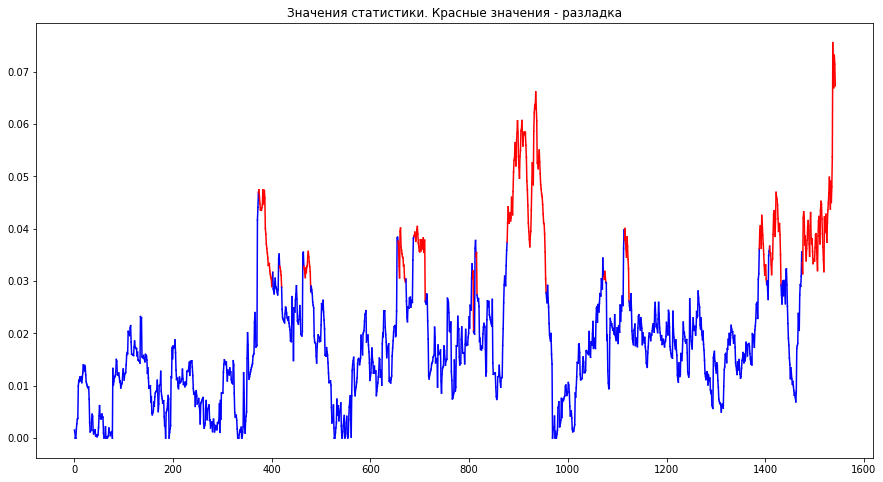

In [5]:
# визуализируем статистику с порогами
fig, ax = plt.subplots(figsize=(15,8))

for i in range(1, len(stat_trajectory)):
    
    x = [i-1, i]
    y = [stat_trajectory[i-1], stat_trajectory[i]]
    
    ax.plot(x, y, color=cusum.breakpoints[i])
  

plt.title('Значения статистики. Красные значения - разладка')
plt.show()

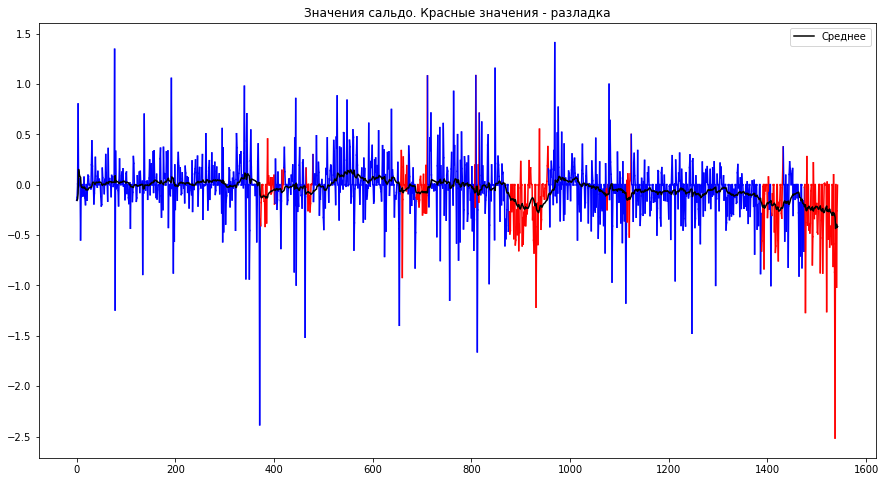

In [6]:
# визуализируем сальдо с порогами
fig, ax = plt.subplots(figsize=(15,8))

for i in range(1, len(data['Balance'].values)):
    
    x = [i-1, i]
    y = [data['Balance'].values[i-1], data['Balance'].values[i]]
    
    ax.plot(x, y, color=cusum.breakpoints[i])
    
ax.plot([i for i in range(1, len(stat_trajectory))], mean_values[1:], color='black',label='Среднее')  
plt.title('Значения сальдо. Красные значения - разладка')
plt.legend()
plt.show()

### Статистика Ширяева-Робертса для выявления разладки в дисперсии

Гиперпараметры также подбирались вручную по визуальному соответствию.

In [7]:
import tslib.shiryaev_roberts_finder as sr_finder

alpha = 0.01
beta = 0.05
# рассматриваем возрастающие разладки
sigma_diff = 0.5

stat_trajectory = []

sr = sr_finder.SRFinder(alpha=alpha, beta=beta, sigma_diff=sigma_diff, ceil=200,
                              trsh=20, slice_length=5, breaks_max=3)
for k, x_k in enumerate(data['Balance'].values):
    sr.update(x_k)
    sr.count_metric()
    stat_trajectory.append(sr.metric)

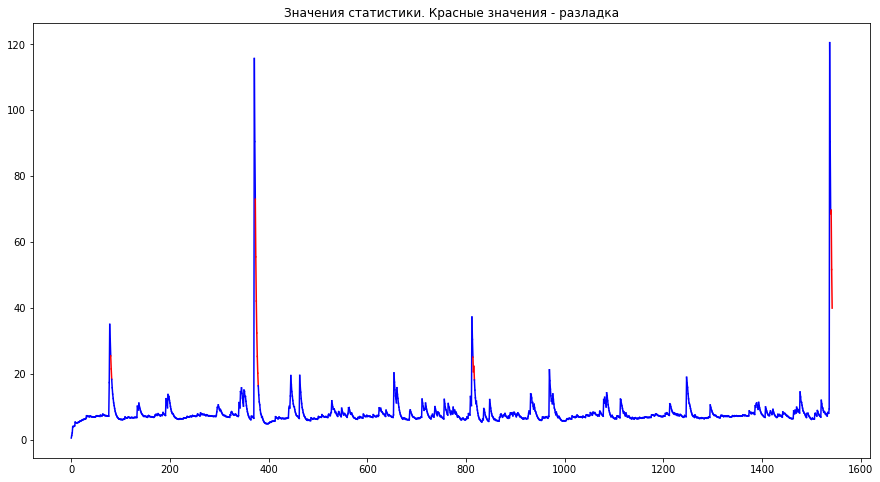

In [8]:
# визуализируем статистику с порогами
fig, ax = plt.subplots(figsize=(15,8))

for i in range(1, len(stat_trajectory)):
    
    x = [i-1, i]
    y = [stat_trajectory[i-1], stat_trajectory[i]]
    
    ax.plot(x, y, color=sr.breakpoints[i])
    
plt.title('Значения статистики. Красные значения - разладка')
plt.show()

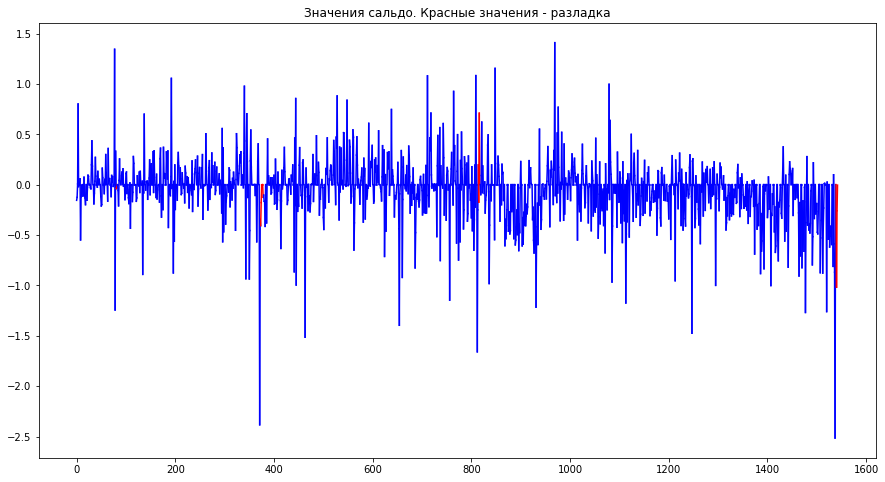

In [9]:
# визуализируем сальдо с порогами
fig, ax = plt.subplots(figsize=(15,8))

for i in range(1, len(data['Balance'].values)):
    
    x = [i-1, i]
    y = [data['Balance'].values[i-1], data['Balance'].values[i]]
    
    ax.plot(x, y, color=sr.breakpoints[i])
    
plt.title('Значения сальдо. Красные значения - разладка')
plt.show()

В основном разладки видны в среднем значении, начинающем убывать.